#**SIGNAL AND IMAGE PROCESSING**

###R036- Daivik Jayan
###R038- Jhalak Mishra
###R044- Tanya Rathod
###R054- Archisha Sinha

Topic:
##***NOISE ADDITION AND REMOVAL FROM AN IMAGE***

#LITERATURE REVIEW


* Image noise, which is typically a component of electrical noise, is the random variation in brightness or colour information in photographs.
* It can be created using a scanner's or a digital camera's image sensor and circuitry. Film grain and the inevitable shot noise of an ideal photon detector are further sources of image noise.
* The unwanted by-product of image capturing known as image noise hides the desired information.
* The phrase "image noise" is typically used to describe noise in 2D images rather than 3D images.
* The word "noise" originally meant "unwanted signal."

* Noise Removal: The technique of removing or reducing noise from the image is known as a noise removal algorithm. The algorithms for noise reduction smooth out the entire image, leaving areas close to contrast boundaries. This reduces or eliminates the visibility of noise. Yet, these techniques may obliterate small, low contrast details.



   AIM: To add and remove different types of noises to and from an image

    1. Gaussian Noise
    2. Poission Noise
    3. Salt and Pepper Noise
    4. Speckled Noise

##GAUSSIAN NOISE

Gaussian noise, is a term from signal processing theory denoting a kind of signal noise that has a probability density function (pdf) equal to that of the normal distribution

Addition:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread('lake.tif',0)

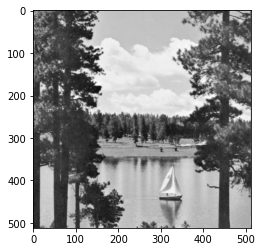

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
def add_gausian_noise(img):
  # Generate Gaussian noise
 gauss = np.random.normal(0,1,img.size) #creates an array of the normal distribution
 gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8') #the new image is a 2D array with row=0 and column=1
# Add the Gaussian noise to the image
 img_gauss = cv2.add(img,gauss)
 plt.imshow(img_gauss,cmap='gray')
 plt.imsave('noisy_image.png',img_gauss)


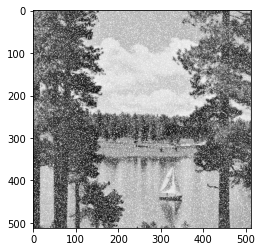

In [ ]:
add_gausian_noise(img)

Removal:

In [ ]:
noisy_image = cv2.imread('noisy_image.png',0)

In [ ]:
def remove_gaussian_noise(image, filter_size=3):
    rows, cols = image.shape
    padded = np.pad(image, [(filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2)], mode='reflect') #padded for corner values
    filtered_image = np.zeros_like(image) #will take the size same as original image
    for i in range(rows):
        for j in range(cols):
            window = padded[i:i+filter_size, j:j+filter_size] #windows are the 8 surrounding cells of the pixels
            filtered_image[i, j] = np.median(window)
    return filtered_image.astype(np.uint8)



filtered_image = remove_gaussian_noise(noisy_image, filter_size=3)


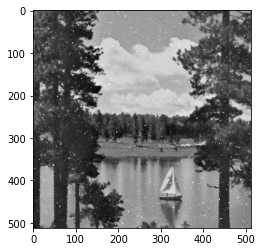

In [ ]:
plt.imshow(filtered_image,cmap='gray')

##POISSON NOISE

AIM: To add and remove Poisson Noise from the image

Poisson noise is a sort of random noise that happens in image processing when a camera sensor detects a finite amount of photons. It derives its name from the Poisson distribution, which describes the distribution of unusual occurrences over a time span.

**Addition:**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

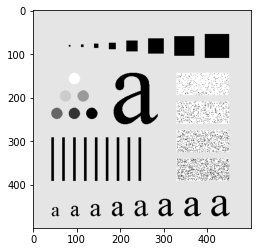

In [ ]:
def add_poisson_noise(img):
    rows, cols = img.shape
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            result[i, j] = int(random.gauss(img[i, j], np.sqrt(img[i, j])))
    return result

# Load the original image
original_img = plt.imread('image.tif', 0)

# Add Poisson noise to the original image
noisy_img = add_poisson_noise(original_img)

# Save the noisy image
plt.imsave('noisy_image.jpg', noisy_img, cmap='gray')

plt.imshow(original_img, cmap='gray')
plt.show()

We create the function **add_poisson_noise**, which accepts an image as input and adds Poisson noise to it. The method begins by obtaining the number of rows and columns in the picture before creating a duplicate of the image to save the noisy image. Then, it iterates over each pixel in the picture, producing random numbers from a Poisson distribution and rounding them to the closest integer value. The picture is then saved using the **plt.imsave** function. In imaging applications, the Poisson noise depicts a statistical process in which the frequency of an event is proportional to the size of the occurrence.

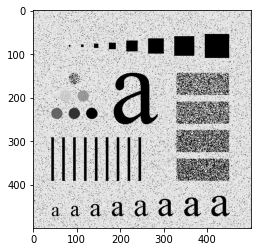

In [ ]:
import matplotlib.pyplot as plt

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg',0)

# Display the noisy image
plt.imshow(noisy_img, cmap='Greys_r')
plt.show()

We first use the **plt.imread** function to load the noisy image. Then, we use the **plt.imshow** function to display the noisy image.

**Removal:**

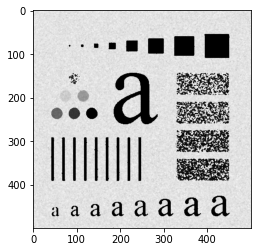

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_poisson_noise(img, kernel_size=3):
    rows = img.shape[0]
    cols = img.shape[1]
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            i_start = max(0, i-kernel_size//2)
            i_end = min(rows, i+kernel_size//2+1)
            j_start = max(0, j-kernel_size//2)
            j_end = min(cols, j+kernel_size//2+1)#image to remain within bounds
            window = img[i_start:i_end, j_start:j_end].flatten()
            result[i, j] = np.median(window)
    return result

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg')

# Remove Poisson noise from the noisy image
denoised_img = remove_poisson_noise(noisy_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

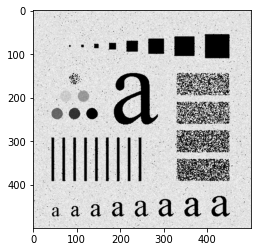

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_poisson_noise(img, kernel_size=3):
    rows = img.shape[0]
    cols = img.shape[1]
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            i_start = max(0, i-kernel_size//2)
            i_end = min(rows, i+kernel_size//2)
            j_start = max(0, j-kernel_size//2)
            j_end = min(cols, j+kernel_size//2)#image to remain within bounds
            window = img[i_start:i_end, j_start:j_end].flatten()
            result[i, j] = np.median(window)
    return result

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg')

# Remove Poisson noise from the noisy image
denoised_img = remove_poisson_noise(noisy_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

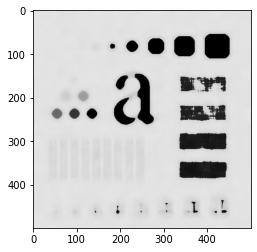

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_poisson_noise(img, kernel_size=20):
    rows = img.shape[0]
    cols = img.shape[1]
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            i_start = max(0, i-kernel_size//2)
            i_end = min(rows, i+kernel_size//2)
            j_start = max(0, j-kernel_size//2)
            j_end = min(cols, j+kernel_size//2)#image to remain within bounds
            window = img[i_start:i_end, j_start:j_end].flatten()
            result[i, j] = np.median(window)
    return result

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg')

# Remove Poisson noise from the noisy image
denoised_img = remove_poisson_noise(noisy_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

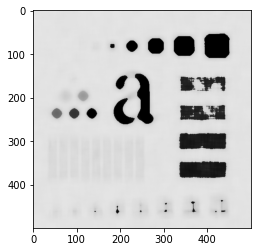

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_poisson_noise(img, kernel_size=20):
    rows = img.shape[0]
    cols = img.shape[1]
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            i_start = max(0, i-kernel_size//2)
            i_end = min(rows, i+kernel_size//2+1)
            j_start = max(0, j-kernel_size//2)
            j_end = min(cols, j+kernel_size//2+1)
            window = img[i_start:i_end, j_start:j_end].flatten()
            result[i, j] = np.median(window)
    return result

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg')

# Remove Poisson noise from the noisy image
denoised_img = remove_poisson_noise(noisy_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

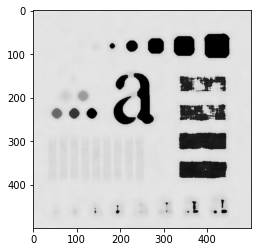

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_poisson_noise(img, kernel_size=19):
    rows = img.shape[0]
    cols = img.shape[1]
    result = img.copy()
    for i in range(rows):
        for j in range(cols):
            i_start = max(0, i-kernel_size//2)
            i_end = min(rows, i+kernel_size//2+1)
            j_start = max(0, j-kernel_size//2)
            j_end = min(cols, j+kernel_size//2+1)
            window = img[i_start:i_end, j_start:j_end].flatten()
            result[i, j] = np.median(window)
    return result

# Load the noisy image
noisy_img = plt.imread('noisy_image.jpg')

# Remove Poisson noise from the noisy image
denoised_img = remove_poisson_noise(noisy_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

We provide a function **remove_poisson_noise** that removes poisson noise from an image given a noisy picture and a kernal size that defines the size of the window or image. The method then builds a zero-initialized array to contain the denoised picture after obtaining the image's row and column counts. Then, it iterates over each pixel in the picture and replaces its intensity value with the median intensity value of its surrounding pixels within the set sliding window size. The denoised image is then saved using the **plt.imsave** function. Because the median value of a group of data is less impacted by outliers than the average value, the median filter efficiently eliminates poisson noise.

## SALT AND PEPPER NOISE

**AIM: To add and remove Salt & Pepper Noise from the image**



Salt-and-pepper noise, also known as impulse noise, is a form of noise sometimes seen on digital images. This noise can be caused by sharp and sudden disturbances in the image signal.
Salt-and-pepper noise is a sparsely occurring white and
black pixels sometimes seen on images.

The Salt & Pepper noise is generally caused by defect of
camera sensor, software failure, or hardware failure in image
capturing or transmission. Due to this situation, Salt & Pepper
noise model, only a proportion of all the image pixels are
corrupted whereas other pixels are non-noisy

Salt & Pepper noise value may be either minimum (0) or
maximum (255). The typical intensity value for pepper noise
is close to 0 and for salt noise is close to 255.



**ADDITION OF SALT AND PEPPER NOISE**

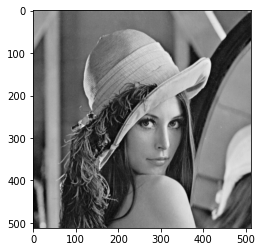

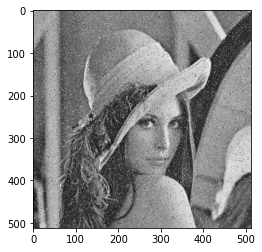

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2 as cv

def add_salt_and_pepper_noise(img):
   # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y=random.randint(0, row - 1)

        # Pick a random x coordinate
        x=random.randint(0, col - 1)

        # Color that pixel to white
        img[y][x] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y=random.randint(0, row - 1)

        # Pick a random x coordinate
        x=random.randint(0, col - 1)

        # Color that pixel to black
        img[y][x] = 0

    return img

#Loading Original Image
original_image = cv.imread('lena_color_512.tif',
                 cv.IMREAD_GRAYSCALE)
# print(original_image)
plt.imshow(original_image, cmap='gray')
plt.show()

img= original_image

# Add Salt-Pepper noise to the original image
SP_noisy_img = add_salt_and_pepper_noise(img)

# Save the noisy image
plt.imsave('SP_noisy_image.jpg', SP_noisy_img, cmap='gray')

plt.imshow(img, cmap='gray')
plt.show()

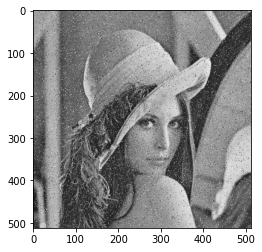

(512, 512, 3)

In [ ]:
import matplotlib.pyplot as plt

# Save the noisy image
plt.imsave('SP_noisy_image.jpg', SP_noisy_img, cmap='gray')

# Load the SP_noisy image
SP_noisy_img = plt.imread('SP_noisy_image.jpg',0)

# Display the SP_noisy image
plt.imshow(SP_noisy_img, cmap='gray')
plt.show()
SP_noisy_img.shape

**REMOVAL OF SALT AND PEPPER NOISE**

**Median filtering**
 Is a nonlinear method widely used to remove ‘salt and
pepper’ type noise. The median filter works by moving
through the image pixel by pixel, replacing each value with
the median value of neighboring pixels within predefined
window size. The median is calculated by first sorting all the
pixel values from the window, and then replacing the pixel
being considered with the middle (median) pixel value. Then
the window slides, pixel by pixel over the entire image.

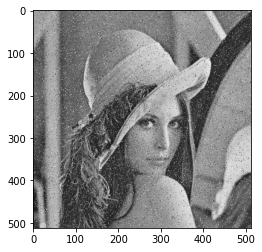

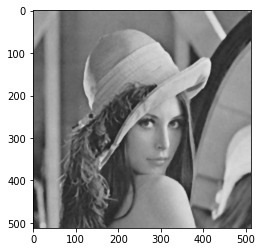

In [ ]:
import numpy as np
import cv2

def remove_noise(img):
    result= cv2.medianBlur(img, 5)
    return result

#Load the Noisy Image
img = cv2.imread("SP_noisy_image.jpg")

#Display the noisy image
plt.imshow(SP_noisy_img, cmap='gray')
plt.show()

#Denoise the image using median filtering function
denoised_img = remove_noise(img)

#Saving the denoised image
cv2.imwrite("denoised_image.jpg", denoised_img)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.show()

In this example, the medianBlur function from the OpenCV library is used to apply median filtering, which replaces each pixel in the image with the median value of the surrounding pixels. The argument 5 in cv2.medianBlur specifies the size of the kernel, which determines the area of the image used to calculate the median.

##SPECKLED NOISE

**AIM: To add and remove Speckled Noise from the image**



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'Original Image')

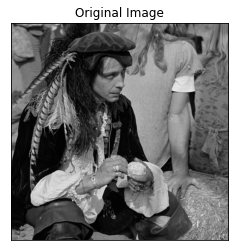

In [ ]:
image=cv2.imread('pirate.tif',0)
plt.imshow(image,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Original Image")

In [ ]:
def add_speckled_noise(img):
  random= np.random.normal(0,1,img.size)
  random = random.reshape(image.shape[0],image.shape[1]).astype('uint8')
  noise = img + img * random
  plt.imshow(noise,cmap='gray')
  plt.imsave('noise.png', noise, cmap='gray')
  cv2.waitKey(0)


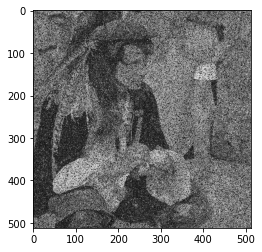

In [ ]:
add_speckled_noise(image)


In [ ]:
noise=cv2.imread('noise.png',0)

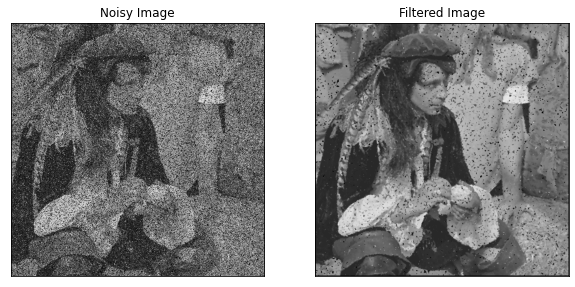

In [ ]:
#Function to get the median of a 1D array
def median(array):
    array = np.sort(array)
    mid = len(array) // 2
    if len(array) % 2 == 0:
        return (array[mid - 1] + array[mid]) / 2
    else:
        return array[mid]

# Applying the median filter to remove speckles
filtered_image = np.zeros_like(noise)
for i in range(1, noise.shape[0] - 1):
    for j in range(1, noise.shape[1] - 1):
        window = noise[i-1:i+2, j-1:j+2].ravel()
        filtered_image[i, j] = median(window)


# Showing the original and filtered images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(noise,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Noisy Image")
plt.subplot(1,2,2)
plt.imshow(filtered_image,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Filtered Image")
plt.show()


#ADVANTAGES OF USING A MEDIAN FILTER

Benefits of using a median filter:


* Removes impulse noise: Impulse noise, which consists of erroneous, abrupt fluctuations in pixel values, is especially well-removed by median filters. Many things, including electrical interference or communication faults, might result in these shifts. The median filter efficiently eliminates the spikes by replacing these noisy pixels with the median value of the pixels around them.

* Edges and details are preserved: In contrast to certain other filter types, median filters do not blur edges or details in a picture. This is due to the fact that they do not average all of the pixel values, merely replacing them with the median value found within the kernel size. As a consequence, the image's crucial elements are maintained.

* Median filters may be swiftly applied to huge datasets without using a lot of processing power since they are computationally efficient.


#DISADVANTAGES OF USING A MEDIAN FILTER

Cons of using a median filter:

* Not effective for all noise types: Although median filters are good at eliminating impulse noise, they are less successful at doing so for other noise types, such as salt-and-pepper or Gaussian noise. These additional sorts of noise could sometimes call for more sophisticated filtering methods.

* Unwanted artefacts, such as blurring in regions of high contrast, or haloes around edges, may be introduced into the picture when the kernel size of the median filter is too big.

* Depending on the nature and degree of the noise, a median filter may not be able to totally eliminate it from a picture. To obtain the appropriate amount of noise reduction, a mix of filtering algorithms may be necessary in certain circumstances.

#ADVANCEMENTS IN IMAGE FILTERING DOMAIN

Recent years have witnessed significant developments in the area of image filtering, with new approaches and algorithms being created to boost the efficacy, speed, and precision of filtering processes. The following are some significant developments in picture filtering:

* Deep learning-based approaches: Convolutional neural networks (CNNs), in particular, have been utilised to enhance the performance of image filtering. Compared to conventional filters, CNN-based filters are more effective because they can learn to recognise and eliminate certain noise or distortion kinds.

* Non-local means (NLM) filters are a form of denoising filter that locates comparable picture areas and calculates the noise level in those regions using a patch-based method. It has been shown that using this method would reduce Gaussian noise while maintaining picture features.

* Wavelet-based filters: Wavelet transformations are used to split up pictures into different frequency bands so that they may be separately filtered. This method preserves picture information while enabling more accurate noise reduction.

* Filters that employ a guided picture to direct the smoothing process are known as guided filters. They are a sort of edge-preserving smoothing filter. The deblurring, colorization, and denoising of images may all be done with this method.

* Adaptive filters: Adaptive filters modify filter parameters pixel-by-pixel using local picture information. This enables more effective noise reduction since they can adjust to changes in picture content and noise levels.

* Variational filters: Variational filters minimise an objective function that strikes a compromise between noise reduction and picture integrity using mathematical optimization approaches. Denoising, deblurring, and inpainting are just a few of the filtering jobs for which this method has been shown to be efficient.

In general, these improvements in image filtering have produced more practical and efficient ways of lowering noise and enhancing picture quality, and they are expected to continue as new approaches and algorithms are created.